<a href="https://colab.research.google.com/github/jamie-miller-rva/Demo-UNC-deep-learning-challenge/blob/main/NN_notebook_optimize_JCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [6]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd

# Import seaborn and assign theme
import seaborn as sns
sns.set_theme(style="darkgrid")


In [3]:
# readin csv file
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Data Dictionary:

* EIN and NAME—Identification columns
* APPLICATION_TYPE—Alphabet Soup application type
* AFFILIATION—Affiliated sector of industry
* CLASSIFICATION—Government organization classification
* USE_CASE—Use case for funding
* ORGANIZATION—Organization type
* STATUS—Active status
* INCOME_AMT—Income classification
* SPECIAL_CONSIDERATIONS—Special consideration for application
* ASK_AMT—Funding amount requested
* IS_SUCCESSFUL—Was the money used effectively

In [4]:
# explore the data
application_df.info()

# 12 columns, 8 of which are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# check the mix of the target variable
application_df["IS_SUCCESSFUL"].value_counts()

# there appears to be a good mix of successful and not successful applications

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

<Axes: >

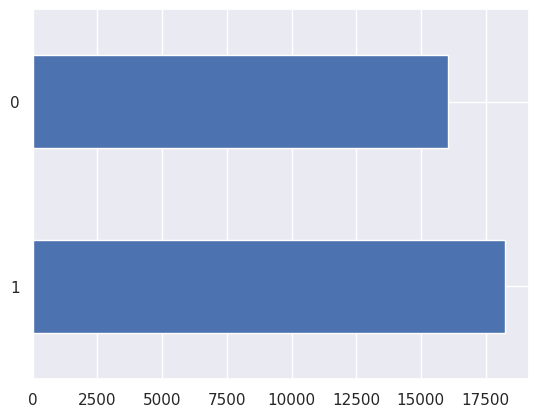

In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# visualize "IS_SUCCESSFUL" mix
application_df["IS_SUCCESSFUL"].value_counts().plot.barh()

In [8]:
# examine "EIN"
application_df["EIN"].value_counts()

# note: "EIN" appears to be just another index and will be removed

10520599     1
626274659    1
630475330    1
630416100    1
630357662    1
            ..
383880377    1
383876652    1
383874900    1
383871370    1
996086871    1
Name: EIN, Length: 34299, dtype: int64

In [9]:
# Drop the non-beneficial 'EIN' column
application_df.drop(columns= "EIN", inplace=True)
application_df.info() # 11 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [10]:
# examine "NAME"

application_df["NAME"].value_counts()

# Note: NAME appears to have some valuable information but will be removed from the inital model for simplicity

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [11]:
# Drop the 'NAME' column for the inital model (for simplicity)
application_df.drop(columns= "NAME", inplace=True)
application_df.info() # 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [12]:
# Generate a list of numeric (non-categorical) columns
application_not_cat = application_df.dtypes[application_df.dtypes != "object"].index.tolist()
application_not_cat

['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL']

In [13]:
# Determine the number of unique values in each column of application_not_cat.
application_df[application_not_cat].nunique()

# it appears "STATUS"  and "IS_SUCCESSFUL" are binary and ASK_AMT is continuous

STATUS              2
ASK_AMT          8747
IS_SUCCESSFUL       2
dtype: int64

In [15]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
# Generate our categorical variable list (having Dtype of "object")

application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [16]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_type = application_df["APPLICATION_TYPE"].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<Axes: ylabel='Density'>

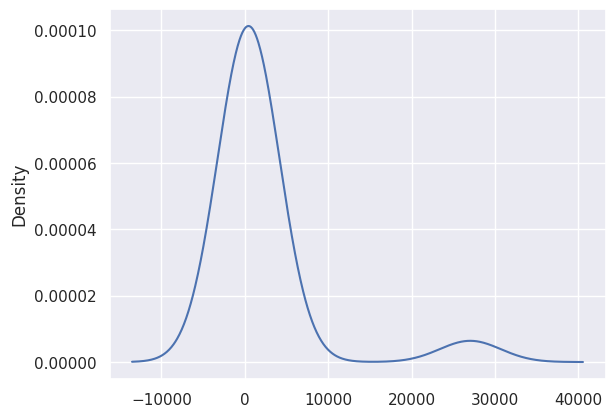

In [17]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [18]:
# Determine which values to replace
replace_application_type = list(application_type[application_type < 1000].index)

# Replace in DataFrame
for application_type in replace_application_type:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(application_type, "Other")

# check to make sure binning was successful
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

<Axes: ylabel='Density'>

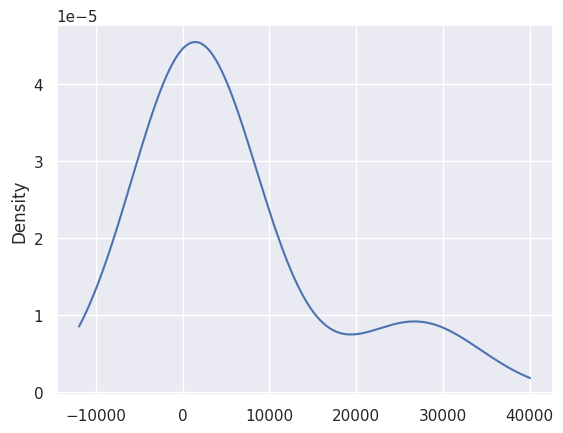

In [19]:
# Visualize the value counts of APPLICATION_TYPE after binning
application_df["APPLICATION_TYPE"].value_counts().plot.density()

# binning appears successful

In [23]:
# Look at CLASSIFICATION value counts for binning
classification_type = application_df["CLASSIFICATION"].value_counts()
classification_type


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<Axes: ylabel='Density'>

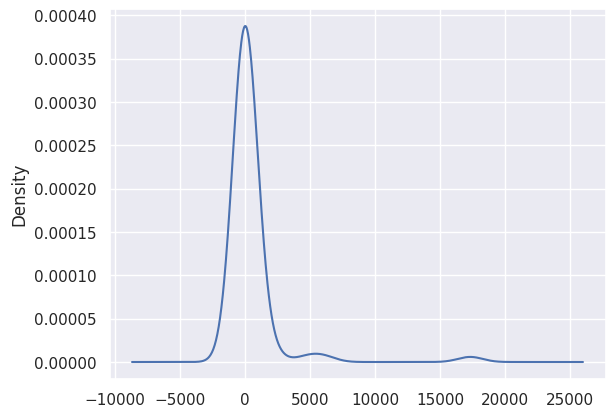

In [24]:
# Visualize the value counts of CLASSIFICATION
classification_type.plot.density()

In [25]:
# Determine which values to replace
replace_classification_type = list(classification_type[classification_type < 500].index)

# Replace in DataFrame
for classification_type in replace_classification_type:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(classification_type, "Other")

# check to make sure binning was successful
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

<Axes: ylabel='Density'>

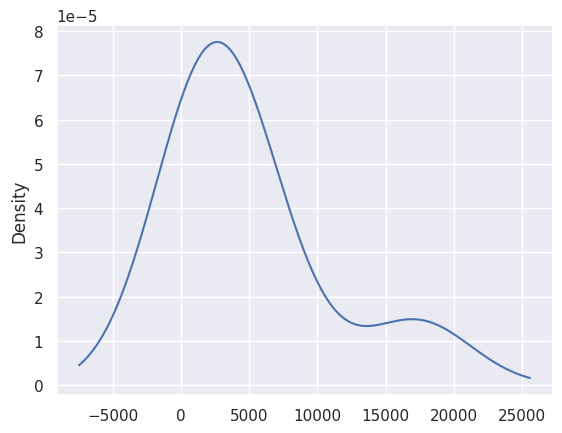

In [26]:
# Visualize the value counts of CLASSIFICATION after binning
application_df["CLASSIFICATION"].value_counts().plot.density()

In [27]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            7
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [29]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
# view shape of encode_df
encode_df.shape

(34299, 39)

Now that our categorical variables have been encoded, they are ready to replace our unencoded categorical variables in our dataset.

To replace these columns, we'll use a combination of Pandas' merge and drop methods. Add and run the following code in the notebook:

In [31]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis= 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
# check that all columns are numeric
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   APPLICATION_TYPE_Other        34299 non-null  float64
 4   APPLICATION_TYPE_T19          34299 non-null  float64
 5   APPLICATION_TYPE_T3           34299 non-null  float64
 6   APPLICATION_TYPE_T4           34299 non-null  float64
 7   APPLICATION_TYPE_T5           34299 non-null  float64
 8   APPLICATION_TYPE_T6           34299 non-null  float64
 9   AFFILIATION_CompanySponsored  34299 non-null  float64
 10  AFFILIATION_Family/Parent     34299 non-null  float64
 11  AFFILIATION_Independent       34299 non-null  float64
 12  AFFILIATION_National          34299 non-null  float64
 13  A

In [34]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE

In [33]:
# Split our preprocessed data into our features and target arrays
y= application_df["IS_SUCCESSFUL"].values
X= application_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
# check the number of features in X (needed for input in NN model below)
len(X_train[0])

41

## Compile, Train and Evaluate the Model

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  (number_input_features * 3)
hidden_nodes_layer2 = (number_input_features * 0.5)

nn_inital = tf.keras.models.Sequential()

# First hidden layer
nn_inital.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1,
        input_dim=number_input_features,
        activation="relu")
)

# Second hidden layer
nn_inital.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2,
    activation="relu")
)

# Output layer
nn_inital.add(tf.keras.layers.Dense(
    units=1,
    activation="sigmoid"
))


# Check the structure of the model
nn_inital.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 123)               5166      
                                                                 
 dense_4 (Dense)             (None, 20)                2480      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 7,667
Trainable params: 7,667
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn_inital.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
# Train the model
fit_model = nn_inital.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5748 - accuracy: 0.7189
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5558 - accuracy: 0.7283
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.7306
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7322
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.7312
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5489 - accuracy: 0.7335
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7338
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5477 - accuracy: 0.7342
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7340
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5472 - accura

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_inital.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5668 - accuracy: 0.7262 - 474ms/epoch - 2ms/step
Loss: 0.5667834281921387, Accuracy: 0.7261807322502136


<Axes: >

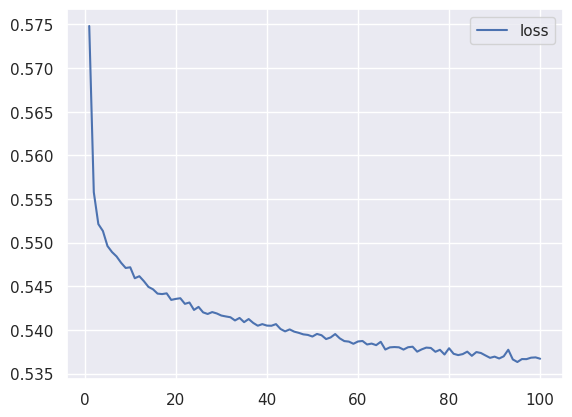

In [44]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<Axes: >

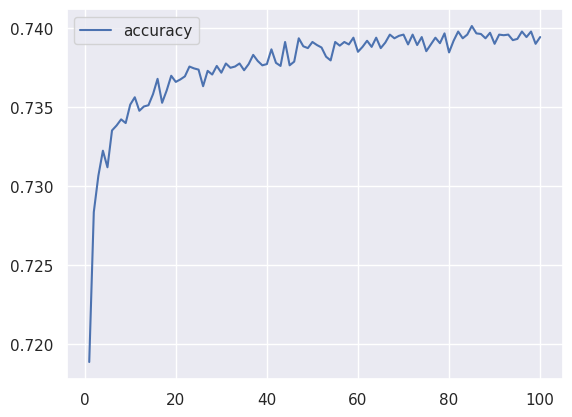

In [45]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [46]:
# Export our model to HDF5 file

# export the fully trained model to HDF5 file
# note: The Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data.

nn_inital.save("./Trained_Models/AlphabetSoupCharity.h5") # redundent but my preference to save to a folder
nn_inital.save("./AlphabetSoupCharity.h5")

In [47]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('./Trained_Models/AlphabetSoupCharity.h5')

In [49]:
nn_imported.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 123)               5166      
                                                                 
 dense_4 (Dense)             (None, 20)                2480      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 7,667
Trainable params: 7,667
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Evaluate the imported model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5668 - accuracy: 0.7262 - 651ms/epoch - 2ms/step
Loss: 0.5667834281921387, Accuracy: 0.7261807322502136


Check: Compare to inital run
268/268 - 0s - loss: 0.5668 - accuracy: 0.7262 - 474ms/epoch - 2ms/step
Loss: 0.5667834281921387, Accuracy: 0.7261807322502136